In [2]:
# Installing the Paramonte library
!pip install paramonte

ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\ProgramData\Anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 462, in read
    n = self.readinto(b)
  File "C:\ProgramData\Anaconda3\lib\http\client.py", line 506, in readinto
    n = self.fp.readinto(b)
  File "C:\ProgramData\Anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\ProgramData\Anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\ProgramData\Anaconda3\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
soc

In [5]:
# Import necessary libraries

import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
!pip install paramonte

In [8]:
import paramonte as pm


:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
::::                                                                                       ::::

       _/_/_/_/                                   _/_/    _/_/
        _/    _/                                  _/_/_/_/_/                     _/
       _/    _/ _/_/_/_/   _/ /_/_/ _/_/_/_/     _/  _/  _/   _/_/   _/_/_/   _/_/_/  _/_/_/
      _/_/_/   _/    _/   _/_/     _/    _/     _/      _/  _/   _/ _/    _/   _/   _/_/_/_/                        
     _/       _/    _/   _/       _/    _/     _/      _/  _/   _/ _/    _/   _/   _/    
  _/_/_/       _/_/_/_/ _/         _/_/_/_/ _/_/_/  _/_/_/  _/_/  _/    _/   _/_/   _/_/_/


                                          ParaMonte
                                   plain powerful parallel
                                     Monte Carlo library
                                        Version 2.5.2

::::                                       

In [11]:
# Loading and Analyzing Data

df=pd.read_csv('Datasets/test.csv')
fig = plt.figure  ( figsize = (4,5)
                  , dpi = 100
                  )
ax = fig.add_subplot(1,1,1)
ax.scatter( df['x']
          , df['y']
          , color = "red" 
          , s = 5 
          )
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Datasets/test.csv'

In [12]:
# Application of Log to Data Points
from scipy.stats import norm
logX = np.log(X)
logY = np.log(y)
 
def getLogLike(param):  
    mean = param[0] + param[1] * logX    
    logProbDensities = norm.logpdf(logY, loc = mean, scale = np.exp(param[2])) 
    return np.sum(logProbDensities)

NameError: name 'X' is not defined

In [13]:
# Building the ParaMonte Model

para = pm.ParaDRAM()
para.spec.overwriteRequested = True 
para.spec.outputFileName = "./regression_powerlaw" 
para.spec.randomSeed = 100 
para.spec.variableNameList = ["intercept", "slope", "logSigma"]
para.spec.chainSize = 1000 
para.runSampler( ndim = 3 
               , getLogFunc = getLogLike 
               )

NameError: name 'getLogLike' is not defined

In [14]:
# Let’s visualize the chain and the samples created by the sampler

chain.plot.scatter( ycolumns = "AdaptationMeasure"
                  , ccolumns = [] 
                  )
chain.plot.scatter.currentFig.axes.set_ylim([1.e-5,1])
chain.plot.scatter.currentFig.axes.set_yscale("log")

NameError: name 'chain' is not defined

In [15]:
sample = para.readSample(renabled = True)[0]
for colname in sample.df.columns:
    sample.plot.line.ycolumns = colname
    sample.plot.line()
    sample.plot.line.currentFig.axes.set_xlabel("MCMC Count")
    sample.plot.line.currentFig.axes.set_ylabel(colname)
    sample.plot.line.savefig( fname = "/traceplot_" + colname )
 
 
for colname in sample.df.columns:
    sample.plot.histplot(xcolumns = colname)
    sample.plot.histplot.currentFig.axes.set_xlabel(colname)
    sample.plot.histplot.currentFig.axes.set_ylabel("MCMC Count")
    sample.plot.histplot.savefig( fname = "/histogram_" + colname )


ParaDRAM - WARNING: The ``delimiter`` is neither given as input to ``readSample()``
ParaDRAM - WARNING: nor set as a simulation specification of the ParaDRAM object. 
ParaDRAM - WARNING: This information is essential, otherwise how could the output files be parsed?
ParaDRAM - WARNING: For now, the ParaDRAM sampler will assume a comma-separated 
ParaDRAM - WARNING: file format for the contents of the sample file(s) to be parsed.


ParaDRAM - FATAL: Failed to detect any sample files with the requested pattern: 
ParaDRAM - FATAL: 
ParaDRAM - FATAL:     ./regression_powerlaw*_sample.txt
ParaDRAM - FATAL: 
ParaDRAM - FATAL: Provide a string, as the value of the input argument ``file``, that either 
ParaDRAM - FATAL: 
ParaDRAM - FATAL:     - points to one or more sample files, or, 
ParaDRAM - FATAL:     - represents the unique name of a ParaMonte simulation. 
ParaDRAM - FATAL:       This unique-name is the common prefix in the names of 
ParaDRAM - FATAL:       the output files of a ParaMont

Exception: Fatal error occurred. Gracefully exiting.

In [16]:
# As we can observe the distribution is almost normal for all the variables. 
# But the Log function distribution is skewed to the right. 
# Let’s see how this is affecting the linear relationship between the dependent variable and independent variable.

values = np.linspace(0,100,101)
yvalues = np.exp(sample.df["intercept"].mean()) * xvalues ** sample.df["slope"].mean()
 
fig = plt.figure(figsize = (4.5,4), dpi = 100)
ax = fig.add_subplot(1,1,1)
 
ax.plot(xvalues, yvalues, "b")
ax.scatter(X, y, color = "red", s = 5)

NameError: name 'sample' is not defined

NameError: name 'sample' is not defined

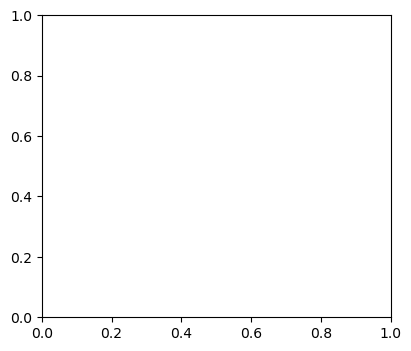

In [17]:
# We can visualize them together to understand the level of uncertainty in our best-fit regression.

values = np.linspace(0,100,101)
 
fig = plt.figure(figsize = (4.5,4), dpi = 100)
ax = fig.add_subplot(1,1,1)
 
 
first = 0
last = 300
slopes = sample.df["slope"].values[first:last]
intercepts = sample.df["intercept"].values[first:last]
 
for slope, intercept in zip(slopes, intercepts):
    yvalues = np.exp(intercept) * xvalues ** slope
    ax.plot( xvalues
           , yvalues
           , "black" 
           , alpha = 0.04 
           )
 
ax.scatter( X, y
          , color = "red"
          , s = 5
          , zorder = 100000
          )